<a href="https://colab.research.google.com/github/helah20/Python/blob/main/weekendProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_python/main/day_09/data/titanic.csv')


# **Part 1: Exploratory Data Analysis**

In [6]:
df.head() # To show the top values of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info() # To explore the colomns and the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe() #to explore statistical information about the dataset 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
print(df.Survived.sum()/df.Survived.count()) #  the presintage of the number of people who survived (38% survived)

0.3838383838383838


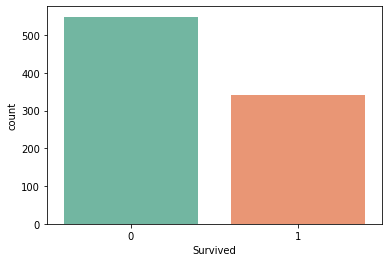

In [24]:
sns.countplot(x='Survived', palette='Set2', data=df) # Data visiualization for how many survived, how many died in titanic 


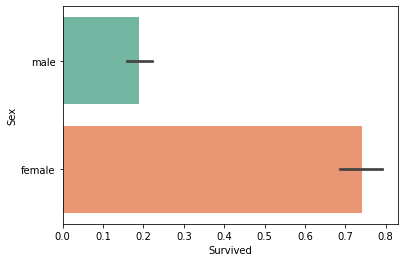

In [30]:
sns.barplot(y="Sex", x="Survived",palette='Set2', data=df) #visiualize of comparison of nuber of survived  based on gender



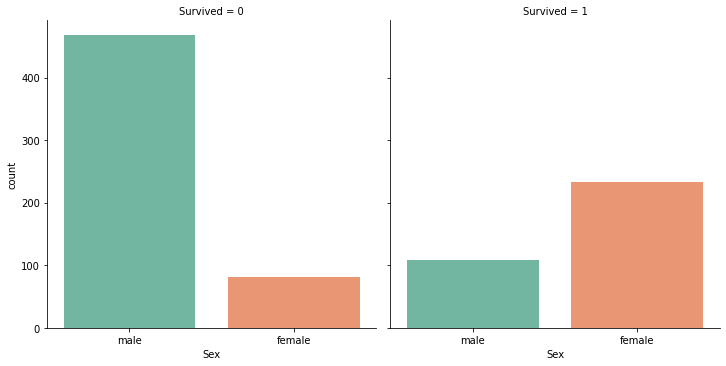

In [23]:
sns.catplot(x='Sex', col='Survived',palette='Set2', kind='count', data=df) #  visiualize of comparison of nuber of survived and died based on gender


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


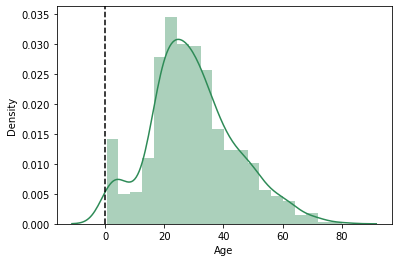

In [41]:
sns.distplot(df['Age'], kde=True , color='seagreen') #  visulize the density of people per thiere age

plt.axvline(0, color="k", linestyle="--") 


In [68]:
print("presentage  of survivals in")  # to show the presentage of survived people in each class
print("Pclass=1 : ", round(df.Survived[df.Pclass == 1].sum()/df[df.Pclass == 1].Survived.count()*100) ,'%')
print("Pclass=2 : ", round(df.Survived[df.Pclass == 2].sum()/df[df.Pclass == 2].Survived.count()*100),'%')
print("Pclass=3 : ", round (df.Survived[df.Pclass == 3].sum()/df[df.Pclass == 3].Survived.count()*100),'%')

presentage  of survivals in
Pclass=1 :  63 %
Pclass=2 :  47 %
Pclass=3 :  24 %


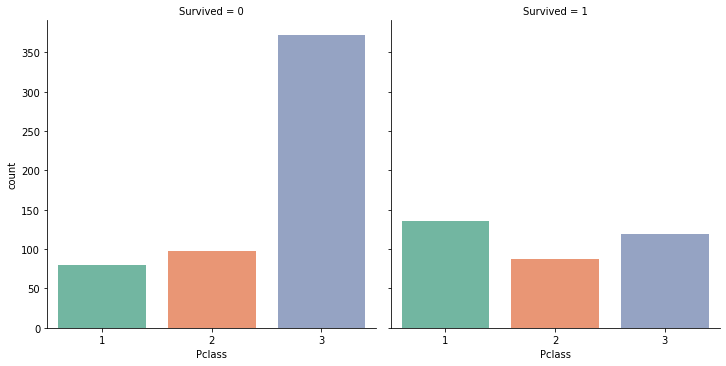

In [46]:
sns.catplot(x='Pclass', col ='Survived', kind = 'count', data = df, palette='Set2') # visualize the comparsion of people who survived or not based on their class


In [73]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True) #  comparsion of people who survived or not based on their class and gender

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

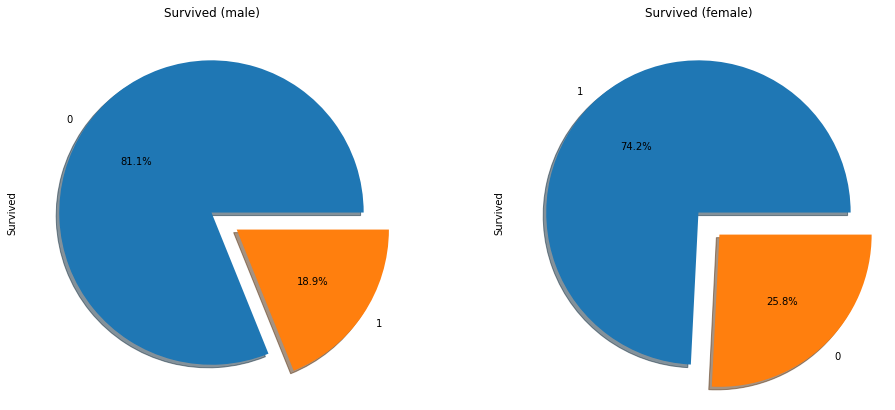

In [61]:
f,ax=plt.subplots(1,2,figsize=(16,7)) # to set the axis
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True ) # to show the presantage of survived and died males 
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)# to show the presantage of survived and died famales
ax[0].set_title('Survived (male)') # to set title for axis 0
ax[1].set_title('Survived (female)')  # to set title for axis 1

plt.show() 



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


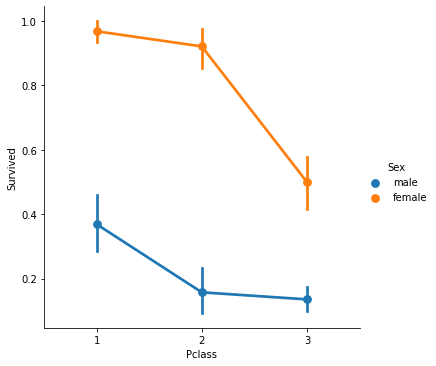

In [75]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=df)

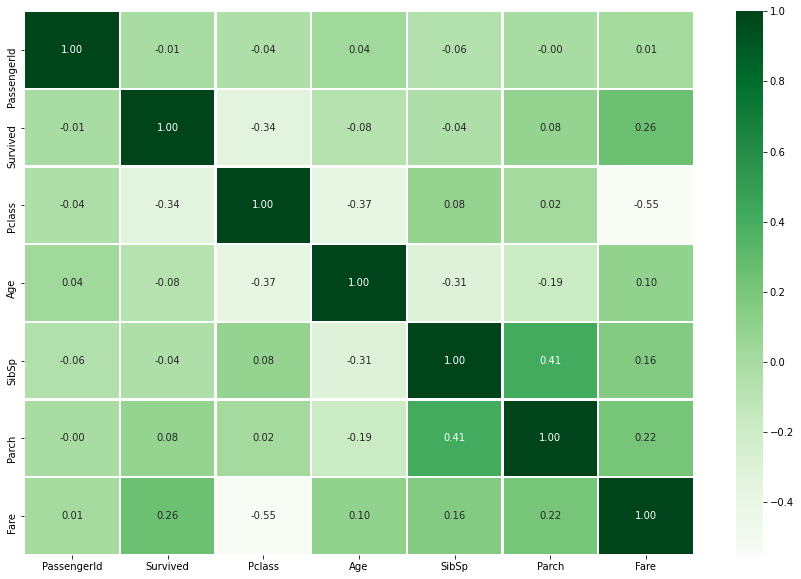

In [91]:
corr = df.corr() # to show the relationship between the dataset featuers by using heatmap
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax, cmap="Greens")
plt.show()


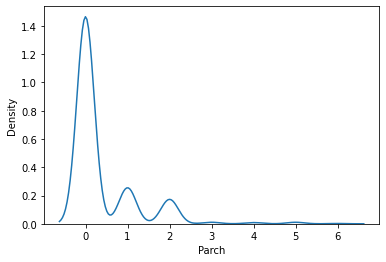

In [94]:
sns.kdeplot(df.Parch) # visulize the total number of the passengers' parents and children 


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


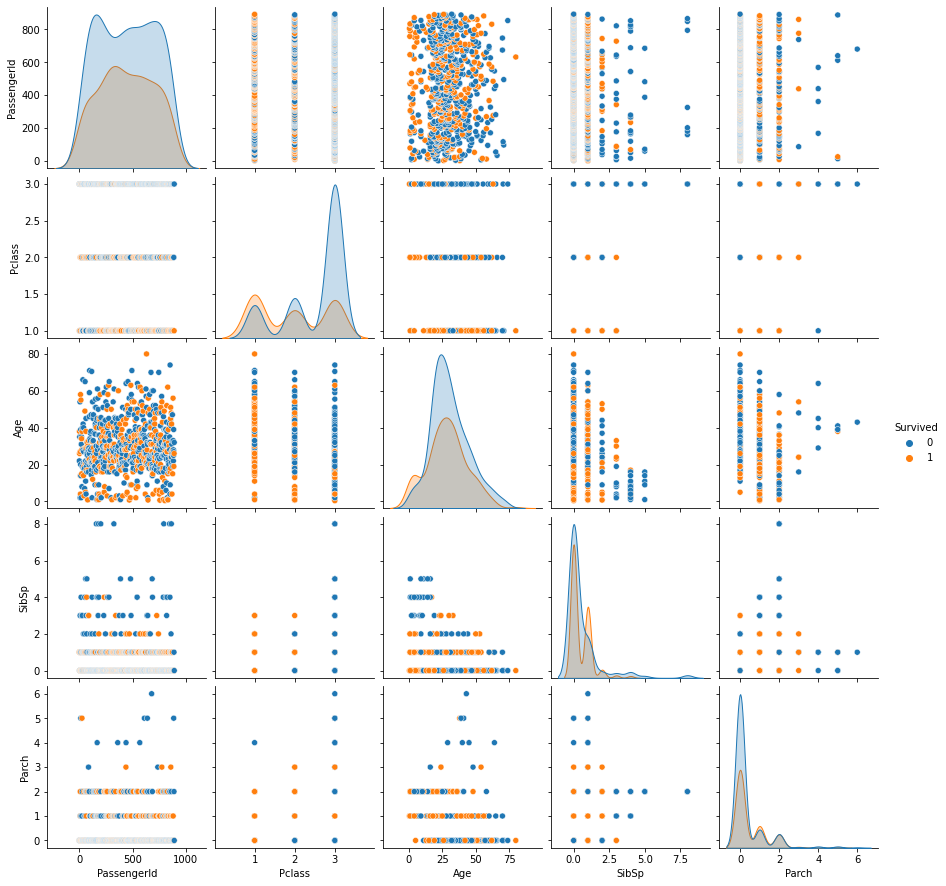

In [96]:
sns.pairplot(df, hue='Survived', size=2.5) # Visualizing the multidimensional relationships among survivors and died




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


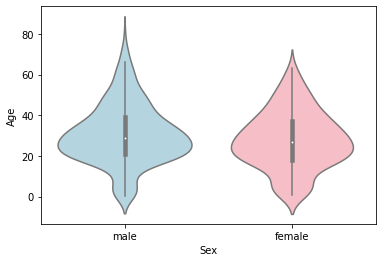

In [97]:
sns.violinplot("Sex", "Age", data=df, palette=["lightblue", "lightpink"]) #   compare distributions using violin plot ( Sex and Age)

